<a href="https://colab.research.google.com/github/noo-nine/Machine-Learning/blob/main/Building%20ROC%20Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes2.csv to diabetes2.csv


In [3]:
diabetes = pd.read_csv('diabetes2.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# exploring the data
# data redundancy
diabetes.duplicated().sum()

0

In [5]:
#na values
diabetes.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [6]:
diabetes.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [7]:
data, target = diabetes['Glucose'], diabetes['Outcome']

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size = 0.3, random_state = 21)

<Axes: xlabel='Glucose', ylabel='Outcome'>

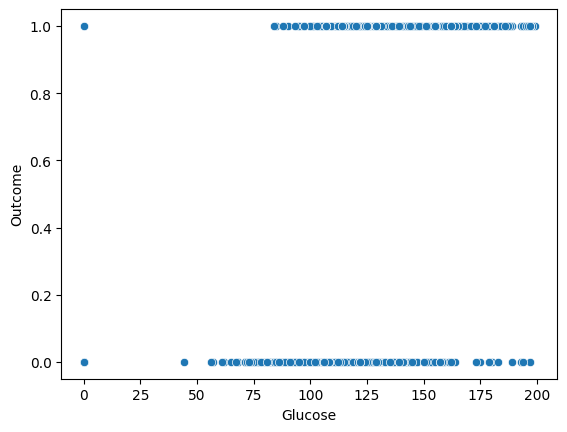

In [9]:
import seaborn as sns
sns.scatterplot( x = x_train, y = y_train)

In [ ]:
# converting the y-axis from probality(diabetic) to log(likelihood)
# likelihood = p/(1 - p)

In [ ]:
# creating values for the new y-axis log_likelihood
p = diabetes['Outcome']
log_odds = np.log(p/(1 - p))
diabetes['Log_Odds'] = pd.Series(log_odds, index = diabetes.index, name = 'Log_Odds')

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [10]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


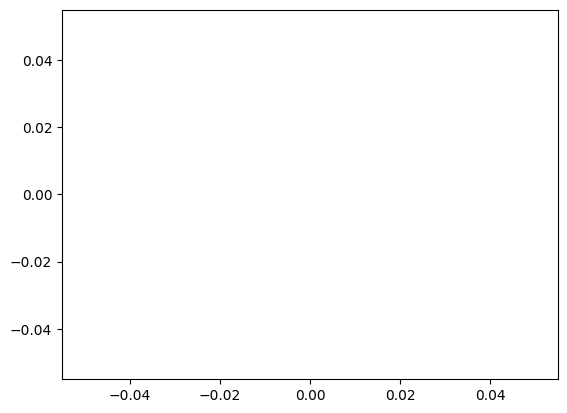

In [ ]:
sns.scatterplot( x = diabetes['Glucose'], y = diabetes['Log_Odds'])
plt.show()

# **Doing logistic regression by importing the model from sklearn**

In [11]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [ ]:
# since we need the 2 dimensional object
# we make it a pandas series and reshape it into 2 dimensional numpy array

In [12]:
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
#x_train = x_train.reshape(-1, 1)
#y_train = y_train.reshape(-1, 1)

In [13]:
log_reg.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [14]:
log_reg.score(x_train, y_train)

0.7672253258845437

In [ ]:
# x_test = x_test.values.reshape(-1, 1)
# y_test = y_test.values.reshape(-1, 1)

In [15]:
log_reg.predict(x_test.values.reshape(-1, 1))

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [16]:
log_reg.score(x_test.values.reshape(-1, 1), y_test)

0.70995670995671

In [17]:
# to prepare the x-axis
x_range = np.linspace(x_train.min(), x_train.max(), 100).reshape(-1, 1)

In [18]:
# preparing y-axis
y_prob = log_reg.predict_proba(x_range)[ :,  1]
# predict_proba is a method in log_reg model just like predict() method
# predict() returns the 0, 1 values which does not make the plotting convenient
# predtict_proba() returns 2D arrays of probabilities

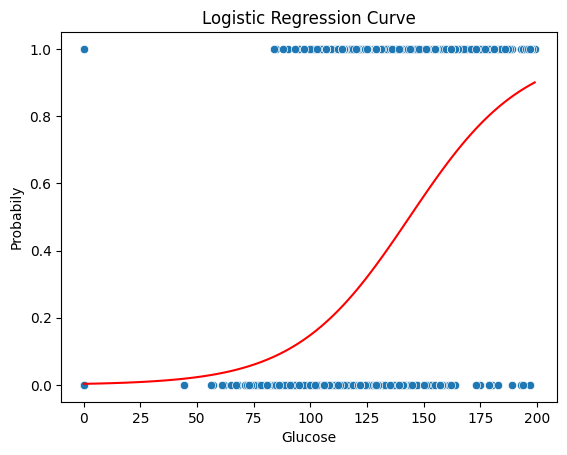

In [20]:
# plotting the model
sns.scatterplot( x = x_train[:, 0], y = y_train[:, 0])
plt.plot( x_range, y_prob, 'red')
plt.xlabel("Glucose")
plt.ylabel("Probabily")
plt.title("Logistic Regression Curve")
plt.show()

In [ ]:
# training data has score of 0.76 and test data has 0.70
# let us try changing some parameters in the logistic regression to optimize the results

# **Changing the Threshold**

In [ ]:
# now we will have different probabilties catergorized into different sections
# compared to previous ones
# so x-axis range remains the same
# we need new y-axis values

In [21]:
threshold = 0.1
y_test_1 = log_reg.predict(x_test.values.reshape(-1, 1))
y_test_1_custom = (y_test_1 >= threshold).astype(int)

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
tp_1, fn_1, fp_1, tn_1 = confusion_matrix(y_test, y_test_1_custom).ravel()
true_pos_1, false_neg_1, false_pos_1, true_neg_1 = confusion_matrix(y_test, y_test_1_custom).ravel()
def sensitivity(true_negs, false_pos, false_negs, true_pos):
    return true_pos/(true_pos + false_negs)
def specificity(true_negs, false_pos, false_negs, true_pos):
    return true_negs/(true_negs + false_pos)
#print("Sensitivity 1: ", sensitivity(tn, fp, fn, tp))
#print("Specificity 1: ", specificity(tn, fp, fn, tp))

In [ ]:
# defining some functions
# building new logistic regression model
#def confusion_matrix_values(thresh):
  #y_test_new = log_reg.predict(x_test.values.reshape(-1, 1))
  #y_test_new_custom = (y_test_new >= thresh).astype(int)
  #tn_new, fp_new, fn_new, tp_new = confusion_matrix(y_test, y_test_new_custom).ravel()
  #return tn_new, fp_new, fn_new, tp_new

[1.0, 0.9655172413793104, 0.7816091954022989, 0.6436781609195402, 0.4942528735632184, 0.367816091954023, 0.25287356321839083, 0.20689655172413793, 0.12643678160919541, 0.0, 0.0]


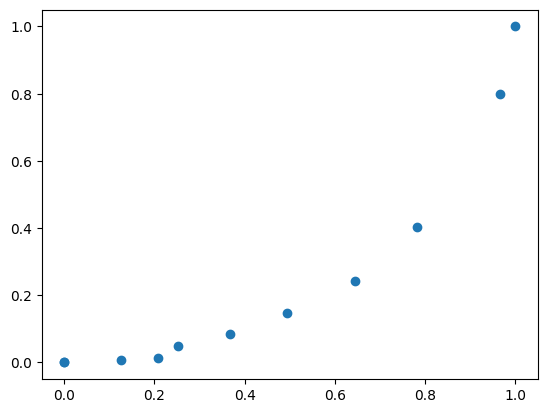

In [27]:
# finding out the best value for threshold
# implementing a loop to plot the points on ROC curve
y_probs = log_reg.predict_proba(x_test.values.reshape(-1, 1))[:, 1]
threshold = 0.0
x_values = []
y_values = []
while(threshold <= 1):
#print("Sensitivity: ", sensitivity(tn_store, fp_store, fn_store, tp_store))
#print("Specificity: ", specificity(tn_store, fp_store, fn_store, tp_store))
  y_preds_custom = (y_probs >= threshold).astype(int)
  tn_store, fp_store, fn_store, tp_store = confusion_matrix(y_test, y_preds_custom).ravel()
  x_values.append(sensitivity(tn_store, fp_store, fn_store, tp_store))
  y_values.append(1 - specificity(tn_store, fp_store, fn_store, tp_store))
  threshold += 0.1
print(x_values)
plt.scatter(x_values, y_values)